In [56]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from mcmc_optimization import optimize_via_mcmc
from models import TwoLayerNN
from data_samplers import BatchSampler
from proposal_generators import TwoLayerNNGaussianProposalGenerator, TwoLayerNNGibbsProposalGenerator
from functions import cross_entropy_loss, softmax
from time import time

In [57]:
digits_X, digits_y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(digits_X, digits_y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [58]:
print(len(X_train[0]))

64


In [59]:
# Initial Parameters

intermediate_size1 = 30
final_size = 10
scale = 1.0
w1 = np.random.normal(loc=0,scale=scale,size=(intermediate_size1,64))
b1 = np.random.normal(loc=0,scale=scale,size=intermediate_size1)
w2 = np.random.normal(loc=0,scale=scale,size=(final_size,intermediate_size1))
b2 = np.random.normal(loc=0,scale=scale,size=final_size)

initial_params = {'w1':w1,'b1':b1,'w2':w2,'b2':b2}

In [65]:
data_sampler = BatchSampler(X=X_train, y=y_train)
#proposal_generator = TwoLayerNNGaussianProposalGenerator(scale=6,decay=1-1e-7)
proposal_generator = TwoLayerNNGibbsProposalGenerator(pct_entries_to_change=0.2, scale=1, decay=1-1e-7)
start = time()
best_params, history = optimize_via_mcmc(TwoLayerNN, initial_params, data_sampler,
                                         proposal_generator, cross_entropy_loss,
                                         beta=95, num_iterations=10000, batch_size=64)
time_elapsed = time() - start

print(time_elapsed, 'sec')

34.066630840301514 sec


In [66]:
print(f"Proportion of proposals accepted: {history['acceptance_ratio']:.4f}")
print(f"Best achieved loss: {min(history['loss_values']):.4f}")

Proportion of proposals accepted: 0.8390
Best achieved loss: 1.7118


In [67]:
best_model = TwoLayerNN(best_params['w1'],best_params['b1'],best_params['w2'],best_params['b2'])

In [68]:
#Check the test set
num_acc = 0
for i,item in enumerate(X_test):
    arg = np.argmax(best_model.forward(item))
    if arg == y_test[i]:
        num_acc += 1
accuracy = num_acc/len(y_test)
print(accuracy)

0.5416666666666666


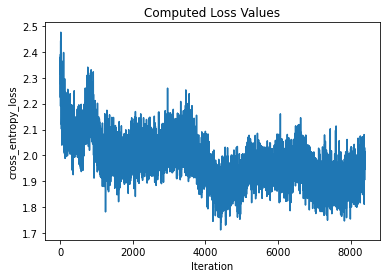

In [69]:
plt.title("Computed Loss Values")
plt.plot(history['loss_values'])
plt.ylabel("cross_entropy_loss")
plt.xlabel("Iteration")
plt.show()

In [71]:
print(best_model.w1)

[[  -3.7490655    90.49051653   -3.08496698 ...   86.19383865
    -5.08770102   36.66296365]
 [-108.412484     60.10215096   -9.49537872 ...    0.27133147
   112.23050573  -49.89653447]
 [  67.66663976   16.9965143    53.12612156 ...   70.23174402
    83.56169003   32.22190784]
 ...
 [  -1.1603961   -59.7588701    48.04019413 ...  -47.3835945
   -74.14140487   23.60811597]
 [  25.48954951   16.84523516  -44.18057891 ...  103.83397139
    45.27948075    1.10466063]
 [ -14.32833923   33.59578879   48.82289758 ...  -46.83210003
    16.47239534   94.42559033]]


In [ ]:
#Need to regularize.